# **BoW Lab:**
## Ricardo Loor
## Santiago Viteri

# 1) Setup

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

Mounted at /content/drive
Current working directory: /content


In [2]:
import pandas as pd
import zipfile
import os

# Path to the zip file and the .tsv file inside it

zip_file_path = '/content/drive/MyDrive/train.tsv.zip'
tsv_file_name = 'train.tsv'

# Extract and load the TSV file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open(tsv_file_name) as file:
        df = pd.read_csv(file, delimiter='\t')

print(df.head())
df.info()

   PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


# 2) Data Processing

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df.drop('Sentiment', axis=1)  # Replace 'target_column' with your actual target column name
y = df['Sentiment']

In [5]:
# For features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Print the shapes to verify
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set shape: X_train: (124848, 3), y_train: (124848,)
Test set shape: X_test: (31212, 3), y_test: (31212,)


## 2.1) Quick EDA

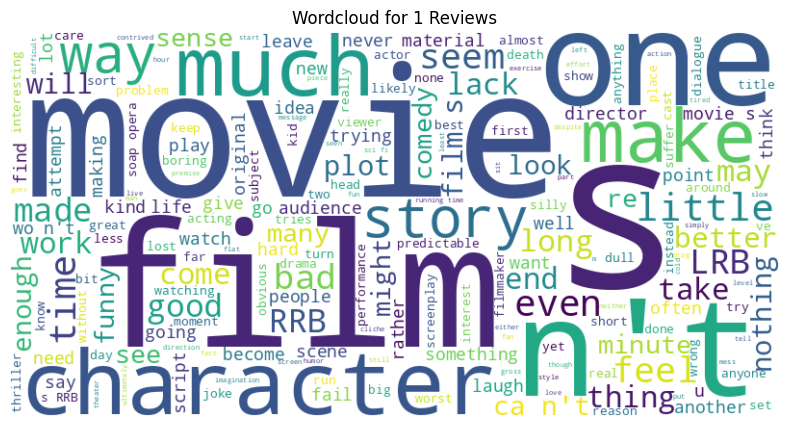

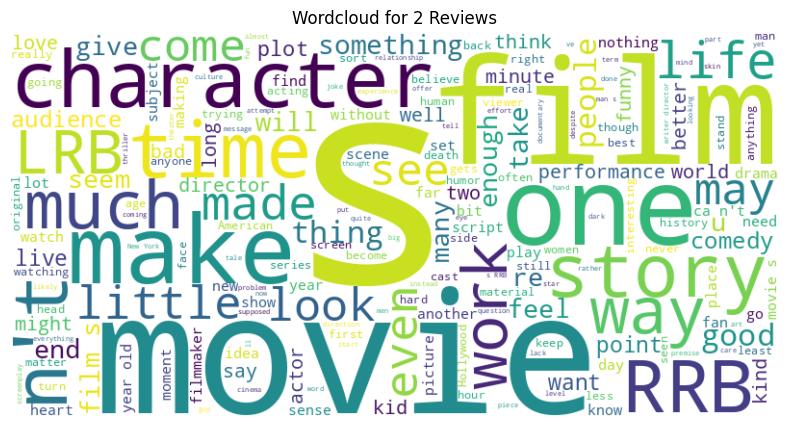

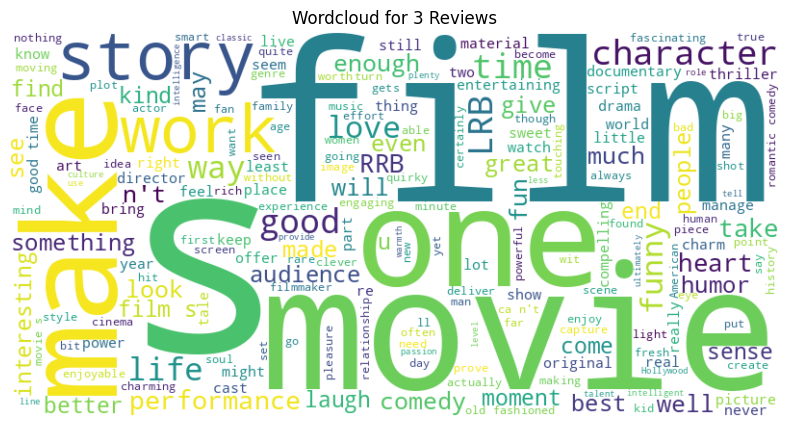

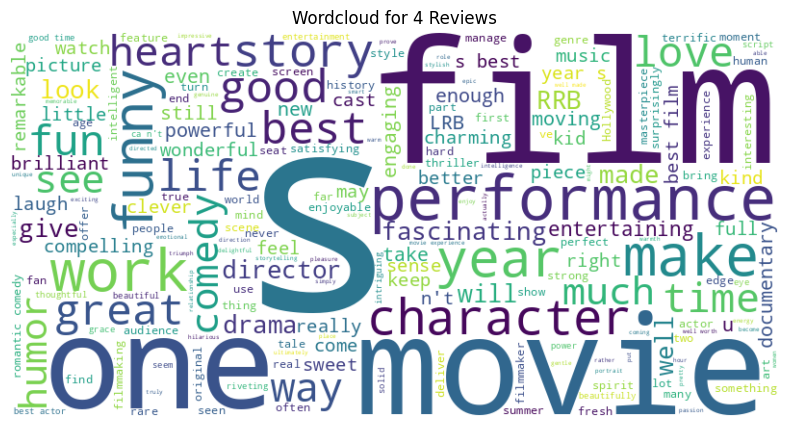

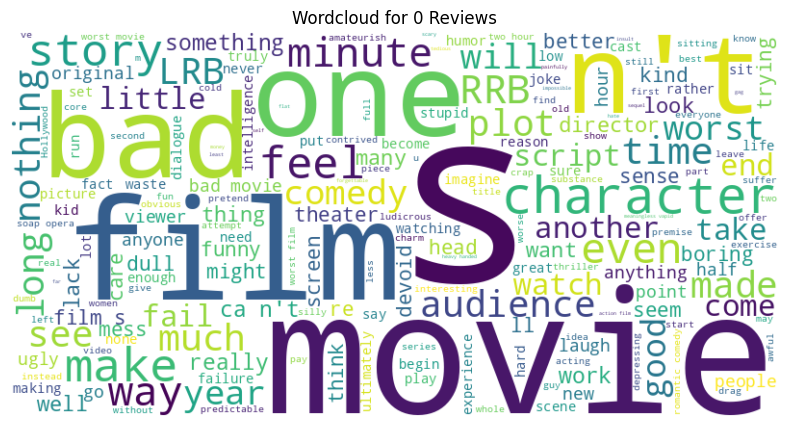

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_wordcloud(texts, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(texts))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

for sentiment in df['Sentiment'].unique():
    texts = df[df['Sentiment'] == sentiment]['Phrase']
    plot_wordcloud(texts, f'Wordcloud for {sentiment} Reviews')

## 2.2) Simple Tokenizacion and BoW

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
df_token = vectorizer.fit_transform(df['Phrase'])

# 3) Train and Evaluate

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_token, df['Sentiment'], test_size=0.2, random_state=42)

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

# 4) Predict

In [11]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.29      0.35      1416
           1       0.50      0.44      0.47      5527
           2       0.69      0.78      0.73     15639
           3       0.53      0.50      0.51      6707
           4       0.49      0.34      0.40      1923

    accuracy                           0.61     31212
   macro avg       0.53      0.47      0.49     31212
weighted avg       0.60      0.61      0.60     31212



##  5) Variations

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Download required NLTK data
nltk.download('punkt')
nltk.download('wordnet')

def prepare_and_train(df, text_column, target_column, feature_engineering='none', test_size=0.2, random_state=42):
    """
    Prepares the data by applying the specified feature engineering, converts text to feature vectors,
    splits the data into training and test sets, trains a Naive Bayes model, evaluates it, and makes predictions.

    Parameters:
    - df: pandas DataFrame containing the data.
    - text_column: str, name of the column containing the text data.
    - target_column: str, name of the column containing the target labels.
    - feature_engineering: str, type of feature engineering to apply ('none', 'stop_words', 'stemming', 'lemmatization', 'tfidf').
    - test_size: float, proportion of the dataset to include in the test split (default is 0.2).
    - random_state: int, seed for the random number generator (default is 42).

    Returns:
    - model: Trained Multinomial Naive Bayes model.
    - X_train: sparse matrix of shape (n_samples_train, n_features) with training feature vectors.
    - X_test: sparse matrix of shape (n_samples_test, n_features) with test feature vectors.
    - y_train: pandas Series with training target labels.
    - y_test: pandas Series with test target labels.
    - report: Classification report as a string.
    """

    # Tokenizer functions for stemming and lemmatization
    def stem_tokens(tokens):
        stemmer = PorterStemmer()
        return [stemmer.stem(token) for token in tokens]

    def lemmatize_tokens(tokens):
        lemmatizer = WordNetLemmatizer()
        return [lemmatizer.lemmatize(token) for token in tokens]

    def tokenizer_stem(text):
        tokens = word_tokenize(text)
        return stem_tokens(tokens)

    def tokenizer_lemmatize(text):
        tokens = word_tokenize(text)
        return lemmatize_tokens(tokens)

    # Choose the feature engineering method
    if feature_engineering == 'stop_words':
        vectorizer = CountVectorizer(stop_words='english')
    elif feature_engineering == 'stemming':
        vectorizer = CountVectorizer(tokenizer=tokenizer_stem)
    elif feature_engineering == 'lemmatization':
        vectorizer = CountVectorizer(tokenizer=tokenizer_lemmatize)
    elif feature_engineering == 'tfidf':
        vectorizer = TfidfVectorizer()
    else:
        vectorizer = CountVectorizer()  # Default without stop words, stemming, or lemmatization

    # Convert text to feature vectors
    X = vectorizer.fit_transform(df[text_column])

    # Extract the target labels
    y = df[target_column]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and train the Naive Bayes model
    model = MultinomialNB()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred)

    return model, X_train, X_test, y_train, y_test, report



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


feature_engineering Parameter: Allows you to specify the type of feature engineering. Options are 'none', 'stop_words', 'stemming', 'lemmatization', and 'tfidf'.

- 'none': No special preprocessing. a.k.a (case folding)
- 'stop_words': Removes stop words using CountVectorizer.
- 'stemming': Applies stemming using the PorterStemmer.
- 'lemmatization': Applies lemmatization using the WordNetLemmatizer.
- 'tfidf': Uses TfidfVectorizer for term frequency-inverse document frequency transformation.


#### 5.1) Stop Words

In [13]:
# Prepare data, train the model, and get evaluation report
model, X_train, X_test, y_train, y_test, report = prepare_and_train(df, 'Phrase', 'Sentiment', feature_engineering='stop_words')

# Print the shapes of the datasets
print(f"Training feature matrix shape: {X_train.shape}")
print(f"Test feature matrix shape: {X_test.shape}")
print(f"Training target labels shape: {y_train.shape}")
print(f"Test target labels shape: {y_test.shape}")

    # Print the classification report
print("Classification Report:")
print(report)

Training feature matrix shape: (124848, 14955)
Test feature matrix shape: (31212, 14955)
Training target labels shape: (124848,)
Test target labels shape: (31212,)
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.28      0.34      1416
           1       0.50      0.41      0.45      5527
           2       0.68      0.80      0.73     15639
           3       0.52      0.50      0.51      6707
           4       0.49      0.30      0.37      1923

    accuracy                           0.61     31212
   macro avg       0.53      0.45      0.48     31212
weighted avg       0.59      0.61      0.60     31212



#### 5.2) Steamming

In [14]:
# Prepare data, train the model, and get evaluation report
model, X_train, X_test, y_train, y_test, report = prepare_and_train(df, 'Phrase', 'Sentiment', feature_engineering='stemming')

# Print the shapes of the datasets
print(f"Training feature matrix shape: {X_train.shape}")
print(f"Test feature matrix shape: {X_test.shape}")
print(f"Training target labels shape: {y_train.shape}")
print(f"Test target labels shape: {y_test.shape}")

    # Print the classification report
print("Classification Report:")
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Training feature matrix shape: (124848, 12134)
Test feature matrix shape: (31212, 12134)
Training target labels shape: (124848,)
Test target labels shape: (31212,)
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.28      0.35      1416
           1       0.51      0.44      0.48      5527
           2       0.69      0.80      0.74     15639
           3       0.53      0.49      0.51      6707
           4       0.49      0.30      0.38      1923

    accuracy                           0.62     31212
   macro avg       0.54      0.46      0.49     31212
weighted avg       0.60      0.62      0.60     31212



#### 5.3) Lemmatization

In [15]:
# Prepare data, train the model, and get evaluation report
model, X_train, X_test, y_train, y_test, report = prepare_and_train(df, 'Phrase', 'Sentiment', feature_engineering='lemmatization')

# Print the shapes of the datasets
print(f"Training feature matrix shape: {X_train.shape}")
print(f"Test feature matrix shape: {X_test.shape}")
print(f"Training target labels shape: {y_train.shape}")
print(f"Test target labels shape: {y_test.shape}")

    # Print the classification report
print("Classification Report:")
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Training feature matrix shape: (124848, 15189)
Test feature matrix shape: (31212, 15189)
Training target labels shape: (124848,)
Test target labels shape: (31212,)
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.29      0.36      1416
           1       0.51      0.46      0.48      5527
           2       0.69      0.79      0.74     15639
           3       0.53      0.50      0.51      6707
           4       0.50      0.33      0.39      1923

    accuracy                           0.62     31212
   macro avg       0.54      0.47      0.50     31212
weighted avg       0.60      0.62      0.61     31212



#### 5.4) Term Frequency-Inverse

In [ ]:
# Prepare data, train the model, and get evaluation report
model, X_train, X_test, y_train, y_test, report = prepare_and_train(df, 'Phrase', 'Sentiment', feature_engineering='tfidf')

# Print the shapes of the datasets
print(f"Training feature matrix shape: {X_train.shape}")
print(f"Test feature matrix shape: {X_test.shape}")
print(f"Training target labels shape: {y_train.shape}")
print(f"Test target labels shape: {y_test.shape}")

    # Print the classification report
print("Classification Report:")
print(report)

Training feature matrix shape: (124848, 15240)
Test feature matrix shape: (31212, 15240)
Training target labels shape: (124848,)
Test target labels shape: (31212,)
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.04      0.07      1416
           1       0.52      0.25      0.34      5527
           2       0.60      0.90      0.72     15639
           3       0.54      0.39      0.45      6707
           4       0.66      0.06      0.11      1923

    accuracy                           0.58     31212
   macro avg       0.60      0.33      0.34     31212
weighted avg       0.58      0.58      0.53     31212



# 7) Conclusion


The choice of feature engineering technique has a significant impact on the Multinomial Naive Bayes model's performance:

Stop Words Removal: Improves model performance to 61% accuracy by filtering out common, non-informative words, but it slightly reduces precision for some classes.

Stemming: Increases accuracy to 62% by normalizing words to their root form (enhances generalization and performance) particularly for class 2.

Lemmatization: Simmilar to stemming it achieves a 62% accuracy with refined word normalization, leading to similar improvements as stemming but with potentially better handling of complex terms.

TF-IDF: Results in lower accuracy (58%) due to overemphasis on rare terms, causing decreased precision and recall for most classes.

In conclusion, stemming and lemmatization improves model performance, while TF-IDF can affect negativelly.